In [1]:
#Import der notwendigen Bibliotheken, Installation mit pip bereits erfolgt

import yfinance as yf
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
#Bearbeitete JSE-Daten (Gesamtbestand)

df_JSEFinal = pd.read_csv(
    'df_JSE_Final_V7.csv',
    sep=',',
    encoding='utf-8',
    index_col=0,
    decimal = '.',
    low_memory=False,
    parse_dates=['Date'],
    dayfirst=True
)

In [3]:
#Bearbeitete SP500-Daten (Gesamtbestand)

df_sp500Final = pd.read_csv(
    'df_SP500_Final_V7.csv',
    sep=',',
    encoding='utf-8',
    index_col=0,
    decimal = '.',
    low_memory=False,
    parse_dates=['Date'],
    dayfirst=True
)

In [4]:
df_sp500Final.info

<bound method DataFrame.info of                      A  AAL  AAP        AAPL        ABBV        ABNB  \
Date                                                                   
2005-06-01   17.296137  NaN  NaN    1.439286         NaN         NaN   
2005-06-02   17.303289  NaN  NaN    1.430000         NaN         NaN   
2005-06-03   17.210300  NaN  NaN    1.365714         NaN         NaN   
2005-06-06   17.539343  NaN  NaN    1.354286         NaN         NaN   
2005-06-07   17.324751  NaN  NaN    1.305000         NaN         NaN   
...                ...  ...  ...         ...         ...         ...   
2025-05-23  108.529999  NaN  NaN  195.270004  183.259995  126.720001   
2025-05-27  111.260002  NaN  NaN  200.210007  185.720001  129.399994   
2025-05-28  110.879997  NaN  NaN  200.419998  183.089996  128.669998   
2025-05-29  113.279999  NaN  NaN  199.949997  185.619995  128.360001   
2025-05-30  111.919998  NaN  NaN  200.850006  186.110001  129.000000   

                   ABT       AC

In [5]:
#Anzahl der Unternehmen, die in den jeweiligen Monaten gelistet waren (Werte verfügbar, SP500)
df_sp500Final.index = pd.to_datetime(df_sp500Final.index)

anzahl_kurse_monatlich_sp500 = df_sp500Final.resample('Y').count()
anzahl_gelistet_sp500 = anzahl_kurse_monatlich_sp500.apply(lambda row: (row > 0).sum(), axis=1)

print(anzahl_gelistet_sp500)

Date
2005-12-31    275
2006-12-31    288
2007-12-31    306
2008-12-31    323
2009-12-31    326
2010-12-31    329
2011-12-31    337
2012-12-31    349
2013-12-31    359
2014-12-31    367
2015-12-31    386
2016-12-31    409
2017-12-31    423
2018-12-31    430
2019-12-31    450
2020-12-31    455
2021-12-31    465
2022-12-31    473
2023-12-31    486
2024-12-31    497
2025-12-31    484
Freq: A-DEC, dtype: int64


In [6]:
#Anzahl der Unternehmen, die in den jeweiligen Monaten gelistet waren (Werte verfügbar, SP500)
df_JSEFinal.index = pd.to_datetime(df_JSEFinal.index)

anzahl_kurse_monatlich_JSE = df_JSEFinal.resample('Y').count()
anzahl_gelistet_JSE = anzahl_kurse_monatlich_JSE.apply(lambda row: (row > 0).sum(), axis=1)

print(anzahl_gelistet_JSE)

Date
2005-12-31    108
2006-12-31    114
2007-12-31    124
2008-12-31    127
2009-12-31    142
2010-12-31    142
2011-12-31    143
2012-12-31    145
2013-12-31    149
2014-12-31    159
2015-12-31    169
2016-12-31    179
2017-12-31    188
2018-12-31    196
2019-12-31    199
2020-12-31    205
2021-12-31    207
2022-12-31    211
2023-12-31    213
2024-12-31    217
2025-12-31    217
Freq: A-DEC, dtype: int64


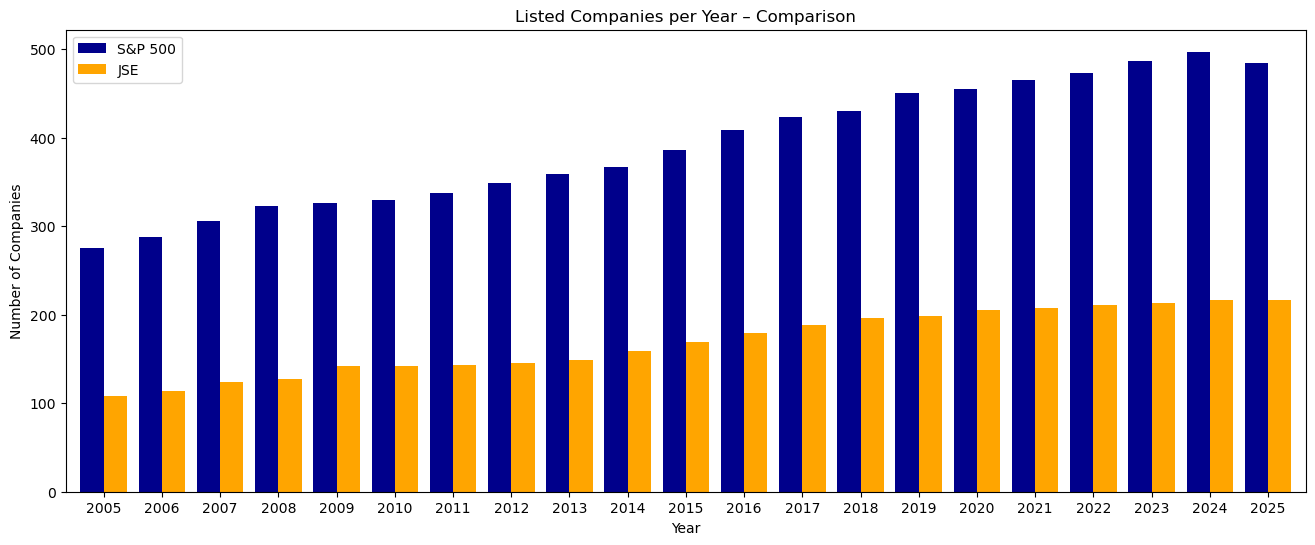

In [7]:
#Visualisierung der vorhandenen Unternehmen im Vergleich über den Zeitverlauf

vergleich_anzahl_unternehmen = pd.DataFrame({
    'S&P 500': anzahl_gelistet_sp500,
    'JSE': anzahl_gelistet_JSE
})

fig, ax = plt.subplots(figsize=(16, 6))
vergleich_anzahl_unternehmen.plot(kind='bar', ax=ax, width=0.8, color= ['darkblue','orange'])

# Nur Dezember-Monate anzeigen
xmonate = vergleich_anzahl_unternehmen.index
xmonatelabels = [dt.strftime('%Y') if dt.month == 12 else '' for dt in xmonate]
ax.set_xticks(range(len(xmonate)))
ax.set_xticklabels(xmonatelabels, rotation=0)

ax.set_title('Listed Companies per Year – Comparison')
ax.set_ylabel('Number of Companies')
ax.set_xlabel('Year')
plt.show()